In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain_tumour/brain_tumour/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
print(r)
print(d)
print(f)
print(paths)
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
print(result)

/content/drive/MyDrive/brain_tumour/brain_tumour/yes
[]
['Y10.jpg', 'Y1.jpg', 'Y101.jpg', 'Y100.JPG', 'Y103.jpg', 'Y102.jpg', 'Y170.JPG', 'Y161.JPG', 'Y157.JPG', 'Y180.jpg', 'Y17.jpg', 'Y16.JPG', 'Y181.jpg', 'Y108.jpg', 'Y153.jpg', 'Y156.JPG', 'Y166.JPG', 'Y15.jpg', 'Y12.jpg', 'Y117.JPG', 'Y109.JPG', 'Y13.jpg', 'Y14.jpg', 'Y120.JPG', 'Y11.jpg', 'Y184.JPG', 'Y159.JPG', 'Y146.JPG', 'Y165.JPG', 'Y169.jpg', 'Y182.JPG', 'Y112.JPG', 'Y114.JPG', 'Y164.JPG', 'Y183.jpg', 'Y106.jpg', 'Y155.JPG', 'Y168.jpg', 'Y111.JPG', 'Y154.jpg', 'Y104.jpg', 'Y115.JPG', 'Y147.JPG', 'Y163.JPG', 'Y162.jpg', 'Y148.JPG', 'Y116.JPG', 'Y160.JPG', 'Y105.jpg', 'Y113.JPG', 'Y107.jpg', 'Y167.JPG', 'Y18.JPG', 'Y158.JPG', 'Y187.jpg', 'Y256.JPG', 'Y246.JPG', 'Y255.JPG', 'Y253.JPG', 'Y4.jpg', 'Y247.JPG', 'Y34.jpg', 'Y37.jpg', 'Y250.jpg', 'Y257.jpg', 'Y30.jpg', 'Y29.jpg', 'Y194.jpg', 'Y19.JPG', 'Y27.jpg', 'Y25.jpg', 'Y249.JPG', 'Y23.JPG', 'Y36.JPG', 'Y242.JPG', 'Y26.jpg', 'Y251.JPG', 'Y40.JPG', 'Y188.jpg', 'Y252.jpg', 'Y259.J

In [4]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain_tumour/brain_tumour/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
print(result)

[array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1.,

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.1, shuffle=True, random_state=0)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 12s 4s/step - loss: 17.6476 - val_loss: 143.4060
Epoch 2/30
3/3 [==============================] - 8s 3s/step - loss: 19.0182 - val_loss: 17.8353
Epoch 3/30
3/3 [==============================] - 9s 2s/step - loss: 7.1630 - val_loss: 16.5212
Epoch 4/30
3/3 [==============================] - 10s 4s/step - loss: 2.8724 - val_loss: 14.0963
Epoch 5/30
3/3 [==============================] - 8s 2s/step - loss: 1.1038 - val_loss: 12.0781
Epoch 6/30
3/3 [==============================] - 10s 3s/step - loss: 0.2482 - val_loss: 13.8938
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 1.0810 - val_loss: 11.9642
Epoch 8/30
3/3 [==============================] - 9s 2s/step - loss: 0.4456 - val_loss: 7.8886
Epoch 9/30
3/3 [==============================] - 12s 4s/step - loss: 0.9414 - val_loss: 7.0766
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.4104 - val_loss: 6.8997
Epoch 11/30
3/3 [==================

{'loss': [17.647602081298828, 19.018207550048828, 7.162986755371094, 2.8723719120025635, 1.103775978088379, 0.24816876649856567, 1.0810085535049438, 0.4456142485141754, 0.9414182901382446, 0.4103609025478363, 0.12288117408752441, 0.946226954460144, 0.10709349811077118, 0.1476733684539795, 5.170352233108133e-05, 0.06465576589107513, 0.024453602731227875, 0.014006879180669785, 0.0011180309811607003, 0.014006959274411201, 0.19257088005542755, 0.08969167619943619, 0.07827431708574295, 0.0058568669483065605, 0.09203596413135529, 0.00014501884288620204, 0.06133773550391197, 0.03792605549097061, 0.00017832155572250485, 7.066363991725666e-07], 'val_loss': [143.40603637695312, 17.83526039123535, 16.52122688293457, 14.096306800842285, 12.078104972839355, 13.893807411193848, 11.96422004699707, 7.888582706451416, 7.076564788818359, 6.899668216705322, 6.828388690948486, 7.865234375, 10.373587608337402, 11.588348388671875, 11.987688064575195, 10.66605281829834, 9.57275390625, 8.650689125061035, 7.86

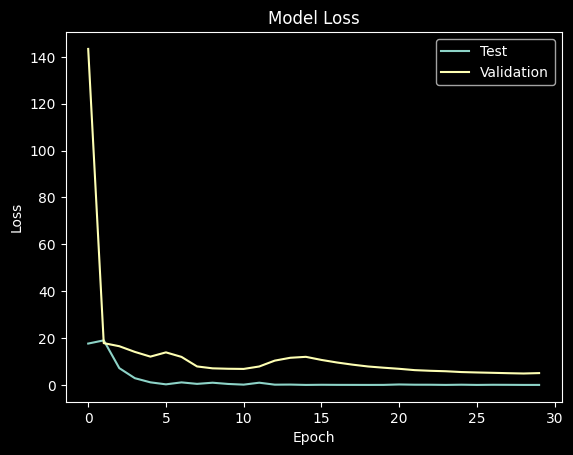

In [11]:
print(history.history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [12]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

[[[[ 29  29  29]
   [ 41  41  41]
   [ 43  43  43]
   ...
   [ 19  19  19]
   [ 31  31  31]
   [200 200 200]]

  [[ 28  28  28]
   [ 40  40  40]
   [ 41  41  41]
   ...
   [ 19  19  19]
   [ 30  30  30]
   [201 201 201]]

  [[ 27  27  27]
   [ 38  38  38]
   [ 39  39  39]
   ...
   [ 18  18  18]
   [ 29  29  29]
   [201 201 201]]

  ...

  [[ 29  29  29]
   [ 28  28  28]
   [ 27  27  27]
   ...
   [ 24  24  24]
   [ 24  24  24]
   [ 24  24  24]]

  [[ 30  30  30]
   [ 29  29  29]
   [ 29  29  29]
   ...
   [ 25  25  25]
   [ 26  26  26]
   [ 25  25  25]]

  [[ 31  31  31]
   [ 30  30  30]
   [ 29  29  29]
   ...
   [ 27  27  27]
   [ 27  27  27]
   [ 27  27  27]]]]
[[2.7899556e-19 1.0000000e+00]]
1
100.0% Confidence. No, Its not a tumor


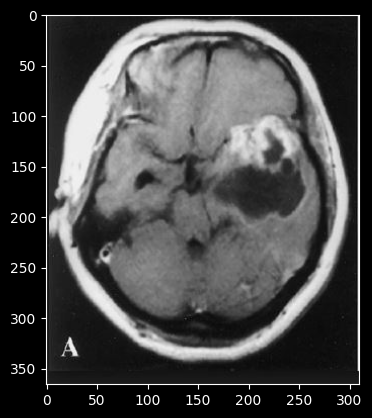

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumour/brain_tumour/yes/Y112.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
print(x)
res = model.predict_on_batch(x)
print(res)
classification = np.where(res == np.amax(res))[1][0]
print(classification)
imshow(img)
print(str(res[0][classification]*100) + '% Confidence. ' + names(classification))